In [1]:
import pandas as pd

In [2]:
t_df = pd.read_csv("./data/교통.csv")
w_df = pd.read_csv("./data/기상.csv")

In [ ]:
seoul_snow_df = (w_df[w_df["강설량_체크"]].groupby(["날짜"])["강수량(mm)"].sum() / 10).reset_index()
seoul_snow_df

## 눈이 내린날과 내리지 않는 날의 [교통량, 교통사고 건수, 통행속도] 간의 상관 관계를 구하여라

In [37]:
t_stat_df  = t_df.groupby("날짜").agg(
    {"교통사고수":sum, "차량통행속도":"mean", "교통량":"sum" }
).reset_index()

In [57]:
w_stat = w_df.groupby("날짜")["강수량(mm)"].sum().reset_index()
w_snow_stat = w_df[
    w_df["강설량_체크"]].groupby("날짜")["강수량(mm)"].sum().reset_index()
w_snow_stat["snow"] = True
w_stat = pd.merge(
    w_stat, 
    w_snow_stat[["날짜","snow"]], 
    how="left", on="날짜")

In [59]:
pd.merge(w_stat, t_stat_df, how="inner", on="날짜").corr()

,강수량(mm),교통사고수,차량통행속도,교통량
강수량(mm),1.000000,0.041487,-0.130020,-0.109489
교통사고수,0.041487,1.000000,-0.676689,0.463052
차량통행속도,-0.130020,-0.676689,1.000000,-0.519251
교통량,-0.109489,0.463052,-0.519251,1.000000


In [60]:
pd.merge(w_stat[w_stat["snow"]==True]
         , t_stat_df, how="inner", on="날짜").corr()

,강수량(mm),교통사고수,차량통행속도,교통량
강수량(mm),1.000000,0.166400,-0.213183,0.019953
교통사고수,0.166400,1.000000,-0.686465,0.499269
차량통행속도,-0.213183,-0.686465,1.000000,-0.480439
교통량,0.019953,0.499269,-0.480439,1.000000


## 눈이 내린날의 강수량 범위 [0~1cm, 1cm ~ 3cm, 3cm ~ 5cm, 5cm 이상] 별로 날수를 구하여라

In [85]:
w_stat["snow"].fillna(False, inplace=True)

In [86]:
import numpy as np

In [117]:
condition_list = [
    (0, 1), (1, 3), (3, 5), (5, np.inf)
]

In [169]:
w_stat["강수량(cm)"] = w_stat["강수량(mm)"] / 10
df_list = []
for idx, condition_value in enumerate(condition_list):    
    condition = (w_stat["강수량(cm)"] > condition_value[0]) \
                 & (w_stat["강수량(cm)"] <= condition_value[1])
    temp = w_stat[condition] 
    temp = temp[temp["snow"]]
    temp["level"] = idx
    df_list.append(temp)

In [135]:
result_df = pd.concat(df_list).reset_index(drop=True)
result_df.groupby("level")["날짜"].count()

level
0    9
1    7
2    4
3    9
Name: 날짜, dtype: int64

## 눈이 내린날의 강수량 범위 [0~1cm, 1cm ~ 3cm, 3cm ~ 5cm, 5cm 이상] [교통량, 교통사고 건수, 통행속도] 간의 상관 관계를 구하여라.

In [140]:
result_df = pd.concat(df_list).reset_index(drop=True)
t_stat_df  = t_df.groupby("날짜").agg(
    {"교통사고수":sum, "차량통행속도":"mean", "교통량":"sum" }
).reset_index()

In [143]:
all_df = pd.merge(result_df, t_stat_df, on="날짜", how="left")

In [161]:
col_names = ["강수량(cm)", "교통사고수", "차량통행속도", "교통량"]
grouped = all_df.groupby("level")
corr_list = [] 
for name, group in grouped:
    print(name)
    corr_list.append(group[col_names].corr())

0
1
2
3


In [166]:
corr_list[0]

,강수량(cm),교통사고수,차량통행속도,교통량
강수량(cm),1.000000,-0.345908,-0.164060,0.185912
교통사고수,-0.345908,1.000000,-0.662585,0.704408
차량통행속도,-0.164060,-0.662585,1.000000,-0.717260
교통량,0.185912,0.704408,-0.717260,1.000000


In [167]:
corr_list[1]

,강수량(cm),교통사고수,차량통행속도,교통량
강수량(cm),1.000000,0.268980,-0.614539,0.493238
교통사고수,0.268980,1.000000,-0.792324,0.820644
차량통행속도,-0.614539,-0.792324,1.000000,-0.851561
교통량,0.493238,0.820644,-0.851561,1.000000


In [168]:
corr_list[2]

,강수량(cm),교통사고수,차량통행속도,교통량
강수량(cm),1.000000,0.301008,-0.994543,0.100905
교통사고수,0.301008,1.000000,-0.370271,0.832329
차량통행속도,-0.994543,-0.370271,1.000000,-0.201786
교통량,0.100905,0.832329,-0.201786,1.000000


In [164]:
corr_list[3]

,강수량(cm),교통사고수,차량통행속도,교통량
강수량(cm),1.000000,0.735189,-0.474855,0.446566
교통사고수,0.735189,1.000000,-0.827011,0.822885
차량통행속도,-0.474855,-0.827011,1.000000,-0.837202
교통량,0.446566,0.822885,-0.837202,1.000000


C:\Users\sc82choi\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sc82choi\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49884 missing from current font.
  font.load_char(ord(s), flags=flags)


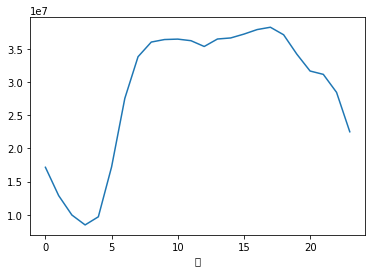

In [20]:
traffic_df.groupby("시")["교통량"].sum().plot()

In [24]:
kwon_dict = {"강북구":"동북권", "광진구":"동북권", "노원구":"동북권", "도봉구":"동북권", 
 "동대문구":"동북권", "성동구":"동북권", "성북구":"동북권", "중랑구":"동북권",
 "강남구":"동남권", "강동구":"동남권", "서초구":"동남권", "송파구":"동남권",
 "용산구":"도심권", "종로구":"도심권", "중구":"도심권", "마포구":"서북권", 
 "서대문구":"서북권", "은평구":"서북권", "강서구":"서남권", "관악구":"서남권", "구로구":"서남권", 
 "금천구":"서남권", "동작구":"서남권", "양천구":"서남권", "영등포구":"서남권"}
temp_df["권역"] = temp_df["구이름"].replace(kwon_dict)

In [32]:
temp_df

,날짜,년,월,일,시,구이름,기온(°C),강수량(mm),날씨,날씨_리스트,강설량_체크,계산된적설량(cm),권역
0,2017-01-01,2017,1,1,0,강남구,1.7,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,동남권
1,2017-01-01,2017,1,1,1,강남구,1.4,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,동남권
2,2017-01-01,2017,1,1,2,강남구,1.2,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,동남권
3,2017-01-01,2017,1,1,3,강남구,0.5,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,동남권
4,2017-01-01,2017,1,1,4,강남구,0.6,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,동남권
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437995,2018-12-31,2018,12,31,19,중랑구,-1.7,0.0,맑음,['맑음'],False,0.0,동북권
437996,2018-12-31,2018,12,31,20,중랑구,-2.4,0.0,맑음,['맑음'],False,0.0,동북권
437997,2018-12-31,2018,12,31,21,중랑구,-2.5,0.0,맑음,['맑음'],False,0.0,동북권
437998,2018-12-31,2018,12,31,22,중랑구,-2.9,0.0,맑음,['맑음'],False,0.0,동북권


In [35]:
temp_stat = temp_df.groupby(["구이름", "날짜"])["기온(°C)"].mean().reset_index()
import seaborn as sns

In [44]:
kang_stat = temp_stat[
    (temp_stat["구이름"] == "강남구") | (temp_stat["구이름"] == "강북구")]

In [1]:
sns.lineplot(x="날짜", y="기온(°C)", hue="구이름", data=kang_stat)

NameError: name 'sns' is not defined

## 시각화

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\sc82choi\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


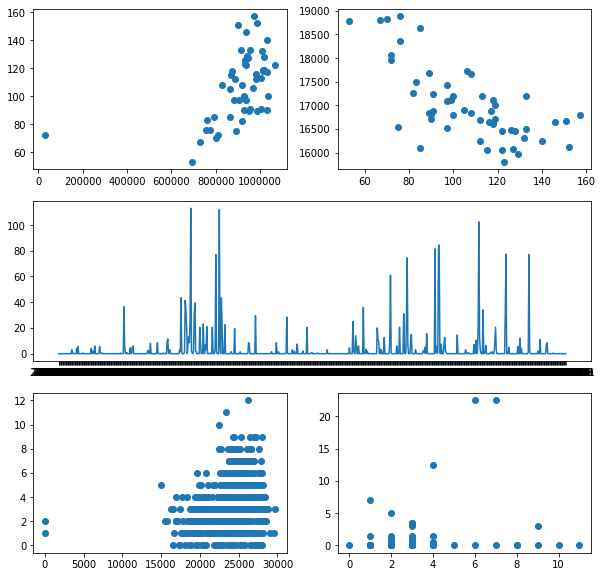

In [83]:
t_df = pd.read_csv("./data/교통.csv")
w_df = pd.read_csv("./data/기상.csv")

snow_days = w_df[w_df["강설량_체크"]]["날짜"].unique()
col_1_names = ["교통량","교통사고수"]
col_2_names = ["교통사고수","차량통행속도"]

df_1 = t_df[t_df["날짜"].isin(snow_days)].groupby("날짜")[col_1_names].sum().reset_index()
df_1 = df_1[col_1_names].rename(
    columns={"교통량":"x","교통사고수":"y"})

df_2 = t_df[t_df["날짜"].isin(snow_days)].groupby("날짜")[col_2_names].sum().reset_index()
df_2 = df_2[col_2_names].rename(
    columns={"교통사고수":"x","차량통행속도":"y"})

df_3 = w_df[w_df["구이름"] == "관악구"].groupby("날짜")["강수량(mm)"].sum().reset_index()
df_3 = df_3.rename(
    columns={"날짜":"x","강수량(mm)":"y"})

df_4 = t_df[w_df["구이름"] == "종로구"].groupby("날짜")[col_1_names].sum().reset_index()
df_4 = df_4[col_1_names].rename(
    columns={"교통량":"x","교통사고수":"y"})

a = t_df[(t_df["날짜"].isin(snow_days)) & (t_df["구이름"]=="종로구")].groupby("날짜")["교통사고수"].sum()
b = w_df[(w_df["날짜"].isin(snow_days)) & (w_df["구이름"]=="종로구")].groupby("날짜")["강수량(mm)"].sum()
df_5 = pd.concat([a,b], axis=1).reset_index(drop=True)
df_5 = df_5.rename(columns={"교통사고수":"x","강수량(mm)":"y"})

df_list = [df_1, df_2, df_3, df_4, df_5]

fig = plt.figure() # figure 반환
fig.set_size_inches(10,10) # 크기지정
ax = []

ax.append(fig.add_subplot(3,2,1)) # 두개의 plot 생성
ax.append(fig.add_subplot(3,2,2))  # 두개의 plot 생성
ax.append(fig.add_subplot(3,1,2)) # 두개의 plot 생성
ax.append(fig.add_subplot(3,2,5)) # 두개의 plot 생성
ax.append(fig.add_subplot(3,2,6))  # 두개의 plot 생성

ax[0].scatter(df_list[0].x, df_list[0].y)
ax[1].scatter(df_list[1].x, df_list[1].y)
ax[2].plot(df_list[2].x, df_list[2].y)
ax[3].scatter(df_list[3].x, df_list[3].y)
ax[4].scatter(df_list[4].x, df_list[4].y)


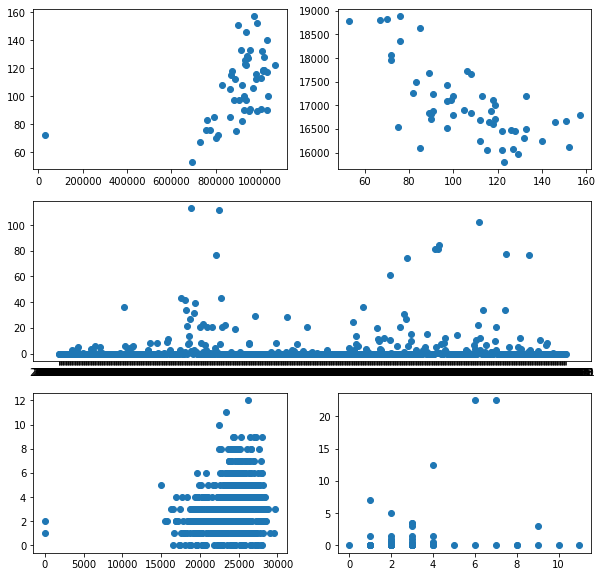

In [82]:
a = [1, 2, 3, 4, 5]
b = ["a", "b", "c", "d", "e"]

for v_1, v_2 in zip(a,b):
    print(v_1, v_2)

1 a
2 b
3 c
4 d
5 e
